## 1.1 Load and explore the training and testing data 

In [61]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss, accuracy_score, classification_report, precision_score, recall_score, f1_score


import time 

class Data(object):
    def __init__(self,name,path):
        self.name = str(name).split('.')[0]
        self.data = pd.read_csv(path+'/'+name)


def plot_auc(labels, probs,model_name):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = roc_curve(labels, probs[:,1])
    AUC = auc(fpr, tpr)
    
    ## Plot the result
    plt.title(model_name + ' ROC')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % AUC)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
def apply_mode(X_train,y_train,X_test,y_test,model,model_name):
    model = model
    tic1 = time.perf_counter()
    model.fit(X_train, y_train.values.ravel())
    toc1 = time.perf_counter()
    tic2 = time.perf_counter()
    y_pred = model.predict(X_test)
    toc2 = time.perf_counter()
    y_pred_prob = model.predict_proba(X_test)
    
    
    model_acc = model.score(X_test,y_test.values.ravel())
    model_log_loss = log_loss(y_test,y_pred)
    model_precision_score = precision_score(y_test,y_pred)
    model_recall_score = recall_score(y_test,y_pred)
    model_f1_score = f1_score(y_test,y_pred)

    print('1- accuracy of {} model is: {:2.2f}'.format(model_name,model_acc))
    print('2- log loss for {} model is: {:2.2f}'.format(model_name,model_log_loss))
    print('3- precision score for {} model is: {:2.2f}'.format(model_name,model_precision_score))
    print('4- recall score for {} model is: {:2.2f}'.format(model_name,model_recall_score))
    print('5- f1 score for {} model is: {:2.2f}'.format(model_name,model_f1_score))
    print('Total elapsed time to fit is: {:0.4f} (s)'.format(toc1 - tic1))
    print('Total elapsed time to predict is: {:0.4f} (s)'.format(toc2 - tic2))
    print('Overal elapsed time to predict is: {:0.4f} (s)'.format(toc2 - tic1))

    plot_auc(y_test, y_pred_prob,model_name) 
 
 
def apply_gridSearch(model,param_grid,X,y,model_name):
    
     model_cv= GridSearchCV(model,param_grid,cv=5,refit=True)
     tic = time.perf_counter()
     model_cv.fit(X,y.values.ravel())
     toc = time.perf_counter()
     
     print ('The best score for the search grid for {} is {:2.2f} '.format(model_name,model_cv.best_score_))
     print('The best parameters for the search grid for {} is {} '.format(model_name,model_cv.best_params_))
     print('Total elapsed time is: {:0.4f} (s)'.format(toc - tic))
            


In [33]:
#load data from jupyter invironment
data_path = '../data/train-test'
data_list = []
for file in os.listdir(data_path):
  data = Data(file,data_path)
  data_list.append(data.name)
  vars()[data.name] = data.data

In [34]:
# print the available data
print ([x for x in data_list])

['bc_data_y_train', 'bc_data_X_train_selected', 'bc_data_X_test_selected', 'bc_data_X_train', 'bc_data_y_test_selected', 'bc_data_y_test', 'bc_data_X_test', 'bc_data_y_train_selected']


In [35]:
# explore the whole data 
print(bc_data_X_train.shape)
print(bc_data_X_test.shape)
print(bc_data_y_train.shape)
print(bc_data_y_test.shape)

(4566, 26)
(2250, 26)
(4566, 1)
(2250, 1)


In [36]:
print(bc_data_X_train.columns)

Index(['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive',
       'Survival Months', 'Race_Other', 'Race_White', 'Marital Status_Married',
       'Marital Status_Separated', 'Marital Status_Single',
       'Marital Status_Widowed', 'T Stage_T2', 'T Stage_T3', 'T Stage_T4',
       'N Stage_N2', 'N Stage_N3', '6th Stage_IIB', '6th Stage_IIIA',
       '6th Stage_IIIB', '6th Stage_IIIC', 'Grade_Grade II', 'Grade_Grade III',
       'Grade_anaplastic', 'A Stage_Regional', 'Estrogen Status_Positive',
       'Progesterone Status_Positive'],
      dtype='object')


In [37]:
# explore the select data 
print(bc_data_X_train_selected.shape)
print(bc_data_X_test_selected.shape)
print(bc_data_y_train_selected.shape)
print(bc_data_y_test_selected.shape)

(4566, 8)
(2250, 8)
(4566, 1)
(2250, 1)


In [38]:
print(bc_data_X_train_selected.columns)

Index(['Survival Months', 'Tumor Size', 'Reginol Node Positive',
       'Grade_Grade II', 'Progesterone Status_Positive', '6th Stage_IIIC',
       'Marital Status_Married', 'Estrogen Status_Positive'],
      dtype='object')


## 2.1 Explore different models with default values

### 2.1.1 With all available data
We will use the default models just to get the idea how they work and then go deeper to each model. Also in below section we will use all the available data.

1- accuracy of Logistic Regression model is: 0.87
2- log loss for Logistic Regression model is: 4.39
3- precision score for Logistic Regression model is: 0.88
4- recall score for Logistic Regression model is: 0.86
5- f1 score for Logistic Regression model is: 0.87
Total elapsed time to fit is: 0.0442 (s)
Total elapsed time to predict is: 0.0010 (s)
Overal elapsed time to predict is: 0.0452 (s)


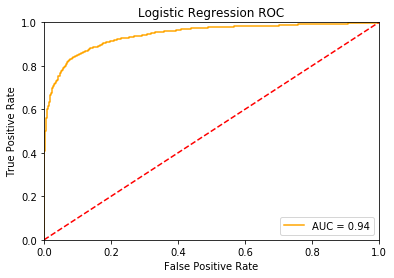

1- accuracy of Random Forest model is: 0.93
2- log loss for Random Forest model is: 2.38
3- precision score for Random Forest model is: 0.93
4- recall score for Random Forest model is: 0.93
5- f1 score for Random Forest model is: 0.93
Total elapsed time to fit is: 0.2743 (s)
Total elapsed time to predict is: 0.0267 (s)
Overal elapsed time to predict is: 0.3010 (s)


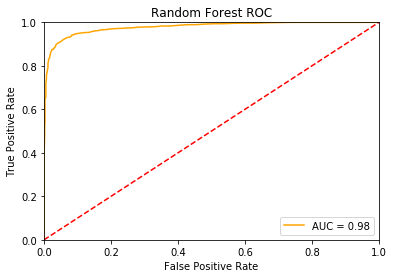

1- accuracy of KNN model is: 0.88
2- log loss for KNN model is: 4.21
3- precision score for KNN model is: 0.83
4- recall score for KNN model is: 0.95
5- f1 score for KNN model is: 0.89
Total elapsed time to fit is: 0.0009 (s)
Total elapsed time to predict is: 0.1558 (s)
Overal elapsed time to predict is: 0.1567 (s)


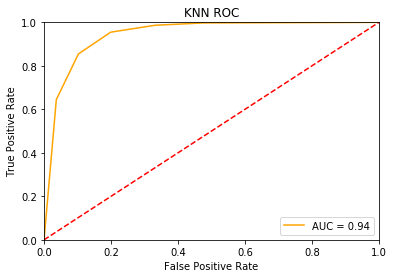

1- accuracy of Decesion Tree Model model is: 0.86
2- log loss for Decesion Tree Model model is: 4.77
3- precision score for Decesion Tree Model model is: 0.85
4- recall score for Decesion Tree Model model is: 0.88
5- f1 score for Decesion Tree Model model is: 0.86
Total elapsed time to fit is: 0.0126 (s)
Total elapsed time to predict is: 0.0010 (s)
Overal elapsed time to predict is: 0.0136 (s)


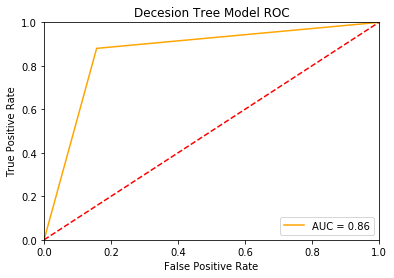

1- accuracy of SVM Model model is: 0.80
2- log loss for SVM Model model is: 6.89
3- precision score for SVM Model model is: 0.85
4- recall score for SVM Model model is: 0.73
5- f1 score for SVM Model model is: 0.78
Total elapsed time to fit is: 4.5594 (s)
Total elapsed time to predict is: 0.6095 (s)
Overal elapsed time to predict is: 5.1689 (s)


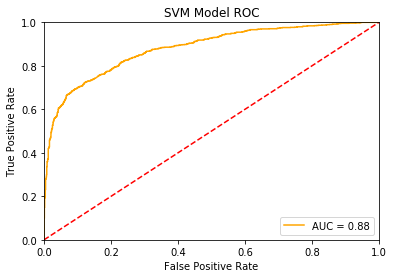

In [63]:
log_reg_model = LogisticRegression()
apply_mode(bc_data_X_train,bc_data_y_train,bc_data_X_test,bc_data_y_test,log_reg_model,'Logistic Regression')

rf_model = RandomForestClassifier()
apply_mode(bc_data_X_train,bc_data_y_train,bc_data_X_test,bc_data_y_test,rf_model,'Random Forest')

knn_model = KNeighborsClassifier()
apply_mode(bc_data_X_train,bc_data_y_train,bc_data_X_test,bc_data_y_test,knn_model,'KNN')

dt_model = DecisionTreeClassifier()
apply_mode(bc_data_X_train,bc_data_y_train,bc_data_X_test,bc_data_y_test,dt_model,'Decesion Tree Model')

SVM_model = SVC(probability=True)
apply_mode(bc_data_X_train,bc_data_y_train,bc_data_X_test,bc_data_y_test,SVM_model,'SVM Model')


### 2.1.2 With selected features
Now lets run the same classifiers on selected data with less features as below:
('Grade_Grade II', 'Progesterone Status_Positive', '6th Stage_IIIC',
'Marital Status_Married', 'Estrogen Status_Positive')

1- accuracy of Logistic Regression for selected data model is: 0.82
2- log loss for Logistic Regression for selected data model is: 6.28
3- precision score for Logistic Regression for selected data model is: 0.83
4- recall score for Logistic Regression for selected data model is: 0.80
5- f1 score for Logistic Regression for selected data model is: 0.81
Total elapsed time to fit is: 0.0304 (s)
Total elapsed time to predict is: 0.0010 (s)
Overal elapsed time to predict is: 0.0314 (s)


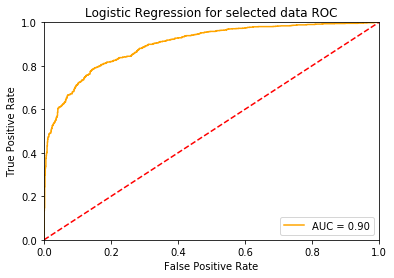

1- accuracy of Random Forest for selected data model is: 0.87
2- log loss for Random Forest for selected data model is: 4.54
3- precision score for Random Forest for selected data model is: 0.88
4- recall score for Random Forest for selected data model is: 0.86
5- f1 score for Random Forest for selected data model is: 0.87
Total elapsed time to fit is: 0.2239 (s)
Total elapsed time to predict is: 0.0271 (s)
Overal elapsed time to predict is: 0.2510 (s)


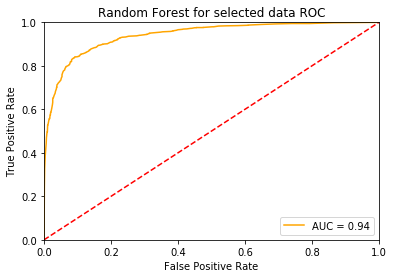

1- accuracy of KNN for selected data model is: 0.85
2- log loss for KNN for selected data model is: 5.14
3- precision score for KNN for selected data model is: 0.84
4- recall score for KNN for selected data model is: 0.86
5- f1 score for KNN for selected data model is: 0.85
Total elapsed time to fit is: 0.0035 (s)
Total elapsed time to predict is: 0.0227 (s)
Overal elapsed time to predict is: 0.0263 (s)


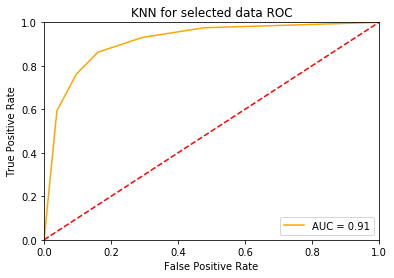

1- accuracy of Decesion Tree Model for selected data model is: 0.83
2- log loss for Decesion Tree Model for selected data model is: 5.79
3- precision score for Decesion Tree Model for selected data model is: 0.83
4- recall score for Decesion Tree Model for selected data model is: 0.84
5- f1 score for Decesion Tree Model for selected data model is: 0.83
Total elapsed time to fit is: 0.0069 (s)
Total elapsed time to predict is: 0.0008 (s)
Overal elapsed time to predict is: 0.0077 (s)


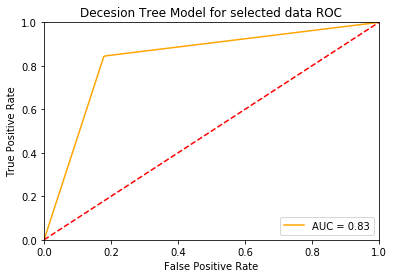

1- accuracy of SVM Model for selected data model is: 0.82
2- log loss for SVM Model for selected data model is: 6.28
3- precision score for SVM Model for selected data model is: 0.86
4- recall score for SVM Model for selected data model is: 0.77
5- f1 score for SVM Model for selected data model is: 0.81
Total elapsed time to fit is: 3.5531 (s)
Total elapsed time to predict is: 0.5140 (s)
Overal elapsed time to predict is: 4.0671 (s)


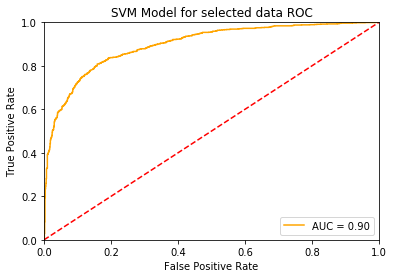

In [64]:
log_reg_model = LogisticRegression()
apply_mode(bc_data_X_train_selected,bc_data_y_train_selected,bc_data_X_test_selected,bc_data_y_test_selected,log_reg_model,'Logistic Regression for selected data')

rf_model = RandomForestClassifier()
apply_mode(bc_data_X_train_selected,bc_data_y_train_selected,bc_data_X_test_selected,bc_data_y_test_selected,rf_model,'Random Forest for selected data')

knn_model = KNeighborsClassifier()
apply_mode(bc_data_X_train_selected,bc_data_y_train_selected,bc_data_X_test_selected,bc_data_y_test_selected,knn_model,'KNN for selected data')

dt_model = DecisionTreeClassifier()
apply_mode(bc_data_X_train_selected,bc_data_y_train_selected,bc_data_X_test_selected,bc_data_y_test_selected,dt_model,'Decesion Tree Model for selected data')

SVM_model = SVC(probability=True)
apply_mode(bc_data_X_train_selected,bc_data_y_train_selected,bc_data_X_test_selected,bc_data_y_test_selected,SVM_model,'SVM Model for selected data')

## 2.2 Default Model Comparision 

### 2.2.1  Comparision Table

Now lets see the result for all the availbe data


| Model | Deafualt values | Accuracy | F1-Score| Elapsed time(s)|
| --- | --- | --- | ---| ---|
| Logistic regression | Solver:lbfgs, Penalty:l2 | 0.87|0.87|0.0413|
| Random Forest| n_estimators=100,criterion=gini| 0.93 | 0.93|0.0366|
| KNN | n_neighbors=5 ,algorithm='auto', leaf_size=30,metric='minkowski'| 0.88| 0.89|0.0412|
| Decesion Tree|criterion='gini'| 0.86| 0.86|0.0105|
|SVM|C=1.0, kernel='rbf', degree=3, gamma='scale'|0.80|0.78|2.3361|

Now lets see the result for fewer selected data

| Model | Deafualt values | Accuracy | F1-Score| Elapsed time(s)|
| --- | --- | --- | ---| ---|
| Logistic regression | Solver:lbfgs, Penalty:l2 | 0.82|081|0.0110|
| Random Forest| n_estimators=100,criterion=gini| 0.87| 0.87| 0.0141|
| KNN | n_neighbors=5 ,algorithm='auto', leaf_size=30,metric='minkowski'| 0.85| 0.85|0.0420|
| Decesion Tree|criterion='gini'| 0.82| 0.83|0.0015|
|SVM|C=1.0, kernel='rbf', degree=3, gamma='scale'|0.82|0.81|1.1410 |

### 2.2.1 Comparision Conclusion
Different classification models with default values, while using all the data or selected data gave us differenet results. 
As seen all models have very close Accurasy and F1-score when using all the data. Elapsed time is much higher in SVM model around 2.33 seconds.

When decreasing the columns and used some specific features('Grade_Grade II', 'Progesterone Status_Positive', '6th Stage_IIIC',
'Marital Status_Married', 'Estrogen Status_Positive') that have most of the data's propertry, the accuracy declined in all models almost by 10%. 
But as expected the elapsed time for running and predicting, was decreased alot. 

In conclusion, as the data is not so huge and the elapsed time does not seem to be a problem for the amount of the data we have, and the accuracy is better with all the data, we will use all the data for deeper analysis.

## 3.1 Modelling

### 3.1.1 Model Exploration 
### There are 5 models that we will investigate with different hyper parameters:
    1- Logistic Regression
    2- Desicion Tree Classifier
    3- Random Forest
    4- KNeighbors Classifier
    5- Support Vector Machine 

Model 1: Logistic Regression

In [41]:
# param_grid = [{'solver':['newton-cg','lbfgs','liblinear','sag','saga'],'penalty':['l2']},
#               {'solver':['liblinear'], 'penalty':['l1']},
#               {'solver':['saga'], 'penalty':['l1','none','elasticnet']}]

param_grid = [{'C':[100, 10, 1.0, 0.1, 0.01]}]
model_1 = LogisticRegression(max_iter = 5000)
apply_gridSearch(model_1,param_grid,bc_data_X_train,bc_data_y_train,'Logistic Regression')

The best score for the search grid for Logistic Regression is 0.85 
The best parameters for the search grid for Logistic Regression is {'C': 10} 
Total elapsed time is: 7.5324 (s)


Model 2: Decision Tree Classifier

In [42]:
param_grid = {'criterion':['gini','entropy'],'max_depth':np.arange(10,100,10),'max_features': ['auto', 'sqrt', 'log2']}
model_2 = DecisionTreeClassifier()
apply_gridSearch(model_2,param_grid,bc_data_X_train,bc_data_y_train,'Decision Tree')

The best score for the search grid for Decision Tree is 0.85 
The best parameters for the search grid for Decision Tree is {'criterion': 'entropy', 'max_depth': 80, 'max_features': 'sqrt'} 
Total elapsed time is: 1.2187 (s)


Model 3: Random Forest Classifier

In [48]:
param_grid = {'criterion':['gini','entropy'],'n_estimators':np.arange(10,200,50),'max_features': ['auto', 'sqrt', 'log2']}
model_3 = RandomForestClassifier()
apply_gridSearch(model_3,param_grid,bc_data_X_train,bc_data_y_train,'Random Forest Classifier')

The best score for the search grid for Random Forest Classifier is 0.92 
The best parameters for the search grid for Random Forest Classifier is {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 110} 
Total elapsed time is: 24.2215 (s)


Model 4: KNeighbors Classifier

In [44]:
param_grid = {'n_neighbors':np.arange(3,50),'algorithm': ['auto','ball_tree','kd_tree','brute']}
model_4 = KNeighborsClassifier()
apply_gridSearch(model_4,param_grid,bc_data_X_train,bc_data_y_train,'KNeighbors Classifier')

The best score for the search grid for KNeighbors Classifier is 0.86 
The best parameters for the search grid for KNeighbors Classifier is {'algorithm': 'auto', 'n_neighbors': 3} 
Total elapsed time is: 41.3592 (s)


Model 5: Support Vector Machine 

In [45]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'sigmoid']}
model_5 = SVC()
apply_gridSearch(model_5,param_grid,bc_data_X_train,bc_data_y_train,'SVM')

The best score for the search grid for SVM is 0.91 
The best parameters for the search grid for SVM is {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'} 
Total elapsed time is: 160.6724 (s)


### 3.1.2  Comparision Table

| Model | Best paramter | Classifier Score | Grid Search Elapsed time(s)|
| --- | --- | --- | ---|
| Logistic regression | {'C': '10'} | 0.85|82.92|
| Decesion Tree| {'criterion': 'entropy', 'max_depth': 80, 'max_features': 'sqrt'} | 0.85| 0.90|
| Random Forest | {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 110}  | 0.92| 9.3|
| KNN|{'algorithm': 'auto', 'n_neighbors': 3} | 0.86|151|
|SVM|{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}  |0.91|93.9|

## 4.1 Final Model Selection

### 4.1.2 Finale Models Comparison 
According to the different models score result, Random Forest and SVM have the highest score equal to 92% AND 91%. Lets compare the perfromance of these models with the selected parameter:

1- accuracy of Randome Forest model is: 0.93
2- log loss for Randome Forest model is: 2.35
3- precision score for Randome Forest model is: 0.94
4- recall score for Randome Forest model is: 0.92
5- f1 score for Randome Forest model is: 0.93
Total elapsed time to fit is: 0.2912 (s)
Total elapsed time to predict is: 0.0306 (s)
Overal elapsed time to predict is: 0.3218 (s)


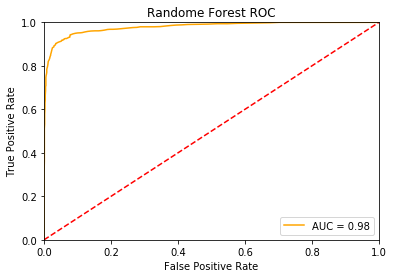

In [49]:
rf_model = RandomForestClassifier(criterion = 'gini', n_estimators= 110,max_features = 'log2')
apply_mode(bc_data_X_train,bc_data_y_train,bc_data_X_test,bc_data_y_test,rf_model,'Randome Forest')

1- accuracy of SVM model is: 0.92
2- log loss for SVM model is: 2.61
3- precision score for SVM model is: 0.90
4- recall score for SVM model is: 0.95
5- f1 score for SVM model is: 0.93
Total elapsed time to fit is: 4.3383 (s)
Total elapsed time to predict is: 0.4878 (s)
Overal elapsed time to predict is: 4.8261 (s)


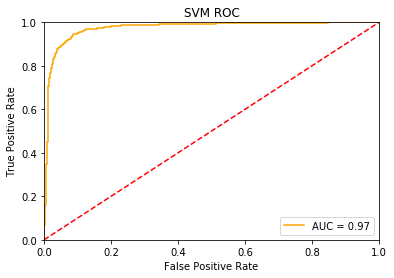

In [50]:
svm_model = SVC(probability=True, C = 10, gamma =0.01, kernel ='rbf')
apply_mode(bc_data_X_train,bc_data_y_train,bc_data_X_test,bc_data_y_test,svm_model,'SVM')

### 4.1.2 Comparison Table

| Model | F1-score | AUC| Overal Elapsed time | Fitting Time| Predicting time|
| --- | --- | --- | ---|---|---|
| Random Forest | 93%|98%| 0.31| 0.28|0.03|
|SVM|93%|97%|2.91|2.79|0.11|

## 4.1 Final Conclusion

After running the models and comparing the result for predicting the test data we see slightly better AUC (98%) for RF comparing to SVM which is 97%%. They both have equal (93%) score.
Also if we consider the performance of the models, Decision Tree took much much less time to fit (0.2877) compared to SVM fitting time (2.79), also much less time to predict the test data (0.03) compared to the SVM predicting time which is (0.11 s).

For our purpose, which is to predict the survival rate of the cancer paitients, we select Randome Forest as our winning model. 
 